Found 1 face
Writing to file ./학생증2.jpg
[(796, 557), (909, 557), (909, 688), (796, 688)]


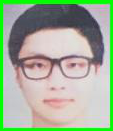

In [111]:
from google.cloud import vision
from PIL import Image, ImageDraw
from IPython.display import display
import io
import os
client = vision.ImageAnnotatorClient()

def detect_face(face_file, max_results=4):
    """Uses the Vision API to detect faces in the given file.

    Args:
        face_file: A file-like object containing an image with faces.

    Returns:
        An array of Face objects with information about the picture.
    """
    client = vision.ImageAnnotatorClient()

    content = face_file.read()
    image = vision.Image(content=content)
    return client.face_detection(
        image=image, max_results=max_results).face_annotations

def highlight_faces(image, faces, output_filename):
    """Draws a polygon around the faces, then saves to output_filename.

    Args:
      image: a file containing the image with the faces.
      faces: a list of faces found in the file. This should be in the format
          returned by the Vision API.
      output_filename: the name of the image file to be created, where the
          faces have polygons drawn around them.
    """
    im = Image.open(image)
    draw = ImageDraw.Draw(im)
    # Sepecify the font-family and the font-size
    for face in faces:
        box = [(vertex.x, vertex.y)
               for vertex in face.bounding_poly.vertices] #detect_face 에서 구한 face의 좌표값을 box에 설정
        print(box)
        draw.line(box + [box[0]], width=5, fill='#00ff00')
        # Place the confidence value/score of the detected faces above the
        # detection box in the output image
        draw.text(((face.bounding_poly.vertices)[0].x,
                   (face.bounding_poly.vertices)[0].y - 30),
                  str(format(face.detection_confidence, '.3f')) + '%',
                  fill='#FF0000')
    cropping_area = (box[0][0],box[0][1],box[2][0],box[2][1]) 
    # 좌하단(box[0]) ,우하단(box[1]), 우상단(box[2]), 우하단(box[3]) ex. [(465, 307), (741, 307), (741, 628), (465, 628)]
    # 좌하단 의 x,y 좌표와  우상단의 x,y좌표로도 사각영역을 만들수 있으로 필요한 데이터는 box[0][0],box[0][1],box[2][0],box[2][1]
                                                                 
    cropped_img = im.crop(cropping_area)
    display(cropped_img)
    im.save(output_filename)

def main(input_filename, output_filename, max_results):
    with open(input_filename, 'rb') as image:
        faces = detect_face(image, max_results)
        print('Found {} face{}'.format(
            len(faces), '' if len(faces) == 1 else 's'))

        print('Writing to file {}'.format(output_filename))
        # Reset the file pointer, so we can read the file again
        image.seek(0)
        highlight_faces(image, faces, output_filename)

main("./학생증.jpg","./학생증2.jpg",3)

In [56]:
import io
import os
from IPython.display import display
from PIL import Image, ImageFont, ImageDraw
# Imports the Google Cloud client library
from google.cloud import vision
def detect_text(path):
    """Detects text in the file."""
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])

        print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
#MAIN
file_name=
img=Image.open(file_name)
display(img)
detect_text("../학생증.jpg")

'../학생증.jpg'

In [15]:
!c:\users\jaylee\anaconda3\python.exe -m pip install --upgrade pip
!pip install --upgrade google-api-python-client
!pip install --upgrade google-cloud-vision
!pip install image

  Attempting uninstall: pip
    Found existing installation: pip 21.1.2
    Uninstalling pip-21.1.2:
      Successfully uninstalled pip-21.1.2
